In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv('dataset.csv')
df

,Flow id,Src IP,Dst IP,Dst port,Protocol,Application protocol,Duration,Received bytes,Received packets,Transmitted bytes,Transmitted packets,Total bytes,Total packets,label,family
0,1566455091978624556,10.127.0.165,93.184.221.240,80,tcp,-,15039,0,0,260,5,260,5,malware,smokeloader
1,-1274379171419048536,10.127.0.165,8.8.8.8,53,udp,dns,38,147,1,73,1,220,2,normal,-
2,3270416796991601836,10.127.0.165,93.184.221.240,80,tcp,-,15016,0,0,260,5,260,5,malware,smokeloader
3,-3669026584616983460,10.127.0.165,8.8.8.8,53,udp,dns,62,157,1,71,1,228,2,normal,-
4,-7257338377092198746,10.127.0.165,93.184.221.240,80,tcp,-,15034,0,0,260,5,260,5,malware,smokeloader
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17095,7560851527351583533,10.127.0.159,8.8.8.8,53,udp,dns,9,137,1,72,1,209,2,normal,-
17096,50553069127977102,10.127.0.159,193.56.146.11,4173,tcp,-,15058,0,0,260,5,260,5,malware,amadey
17097,-2996130545563176908,10.127.0.159,193.56.146.11,4173,tcp,-,15012,0,0,260,5,260,5,malware,amadey
17098,-2750654052729031985,10.127.0.99,193.56.146.220,4174,tcp,-,11433,19135,294,1113893,830,1133028,1124,malware,amadey


In [18]:
cols = ['Flow id', 'Dst port', 'Protocol']
df = df[cols]

In [19]:
data = df.groupby(['Dst port']).agg({'Flow id': 'count'}).reset_index().sort_values("Flow id", ascending=False)
data = data[data['Flow id'] >= 20]
data = data.sort_values('Flow id', ascending=False)

Text(0, 0.5, 'Number of occurances')

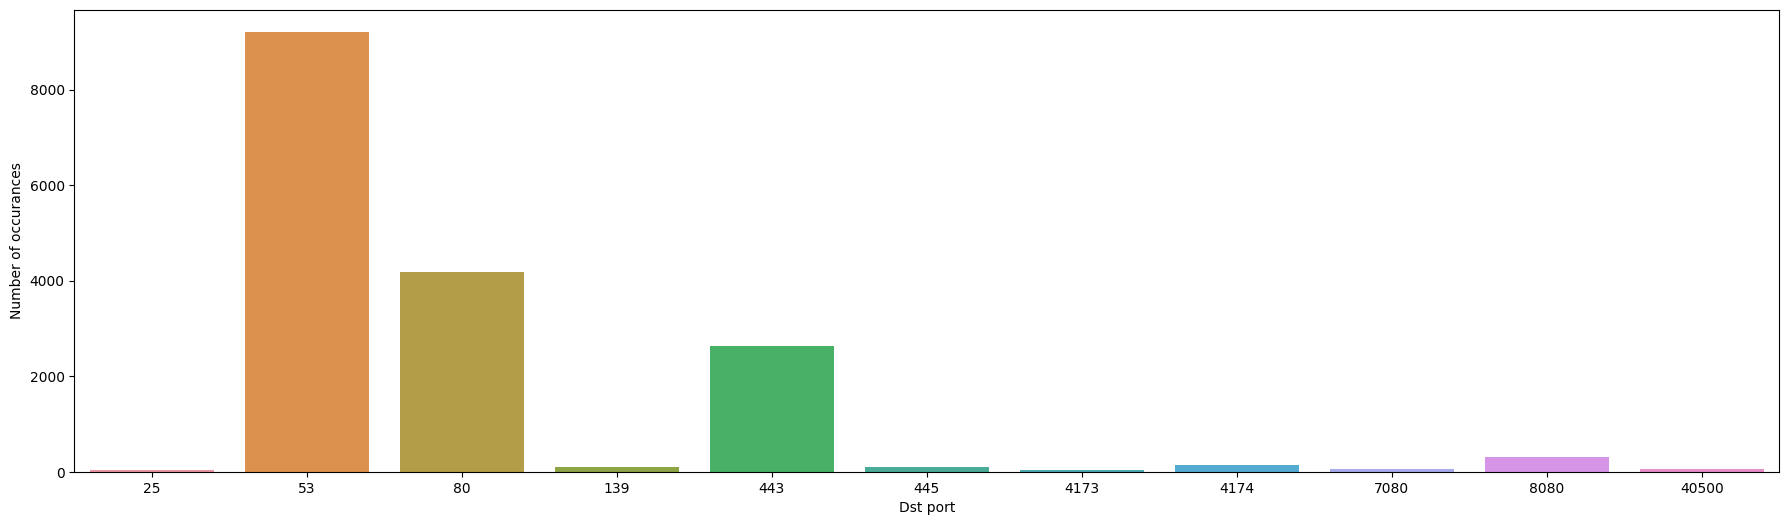

In [20]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(22, 6))
sns.barplot(data=data, x='Dst port', y='Flow id', ax=ax)
ax.set_ylabel("Number of occurances")

Text(0, 0.5, 'Number of occurances')

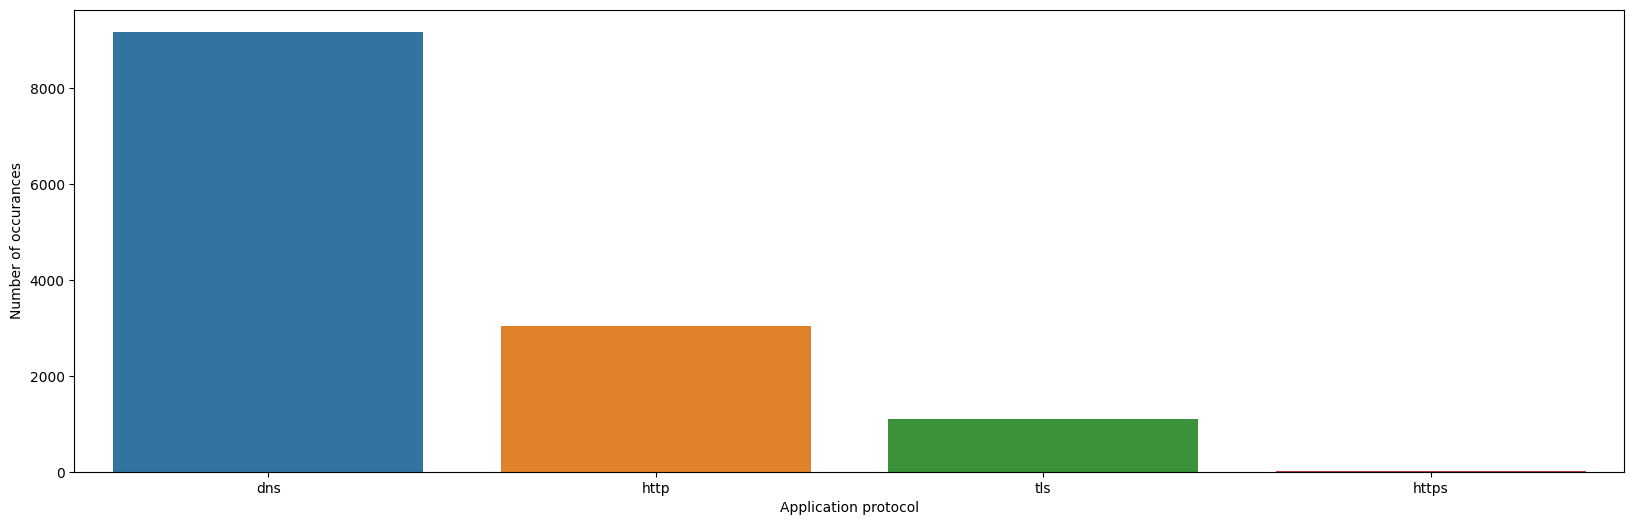

In [21]:
df2 = pd.read_csv('dataset.csv')
data2 = df2.groupby(['Application protocol']).agg({'Flow id': 'count'}).reset_index().sort_values("Flow id", ascending=False)
data2 = data2[data2['Application protocol'] != "-"]
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(20, 6))
#sns.catplot(data=data, x='Dst port', y='Flow id', kind='bar')
sns.barplot(data=data2, x='Application protocol', y='Flow id', ax=ax)
ax.set_ylabel("Number of occurances")

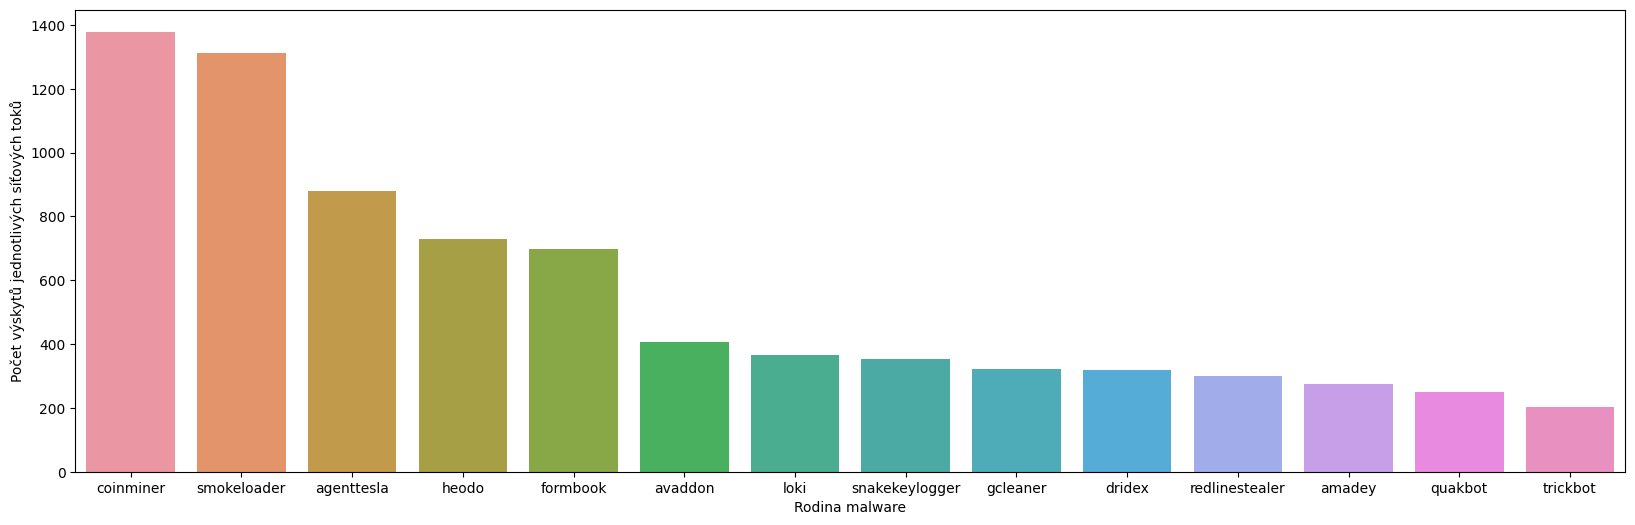

In [22]:
df = pd.read_csv('dataset.csv')
cols = ['Flow id', 'family']
df = df[cols]
data3 = df.groupby(['family']).agg({'Flow id': 'count'}).reset_index().sort_values("Flow id", ascending=False)
data3 = data3[data3['family'] != "-"]
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(20, 6))
#sns.catplot(data=data, x='Dst port', y='Flow id', kind='bar')
sns.barplot(data=data3, x='family', y='Flow id', ax=ax)
ax.set_ylabel("Počet výskytů jednotlivých síťových toků")
ax.set_xlabel("Rodina malware")
plt.savefig("img/flow_family.png")

In [23]:
# Check if there are no duplicate flow which belong to normal and malware simultaneously
df = pd.read_csv('dataset.csv')
df2 = pd.read_csv('dataset2.csv')
df = df.drop('Flow id', axis=1)
df2 = df2.drop('Flow id', axis=1)
# Find duplicated rows that differs in label
cols = ['Src IP', 'Dst IP', 'Dst port', 'Protocol', 'label']
df = df[cols]
df2 = df2[cols]
res = df.append(df2)
res = res[res.duplicated()]
res

/tmp/ipykernel_13802/2848256482.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = df.append(df2)


,Src IP,Dst IP,Dst port,Protocol,label
2,10.127.0.165,93.184.221.240,80,tcp,malware
3,10.127.0.165,8.8.8.8,53,udp,normal
4,10.127.0.165,93.184.221.240,80,tcp,malware
5,10.127.0.165,8.8.8.8,53,udp,normal
6,10.127.0.165,8.8.8.8,53,udp,normal
...,...,...,...,...,...
27076,10.0.2.61,142.251.36.72,443,udp,normal
27077,10.0.2.61,8.8.8.8,53,udp,normal
27078,10.0.2.61,8.8.8.8,53,udp,normal
27079,10.0.2.61,8.8.8.8,53,udp,normal


Text(0, 0.5, 'Number of occurances')

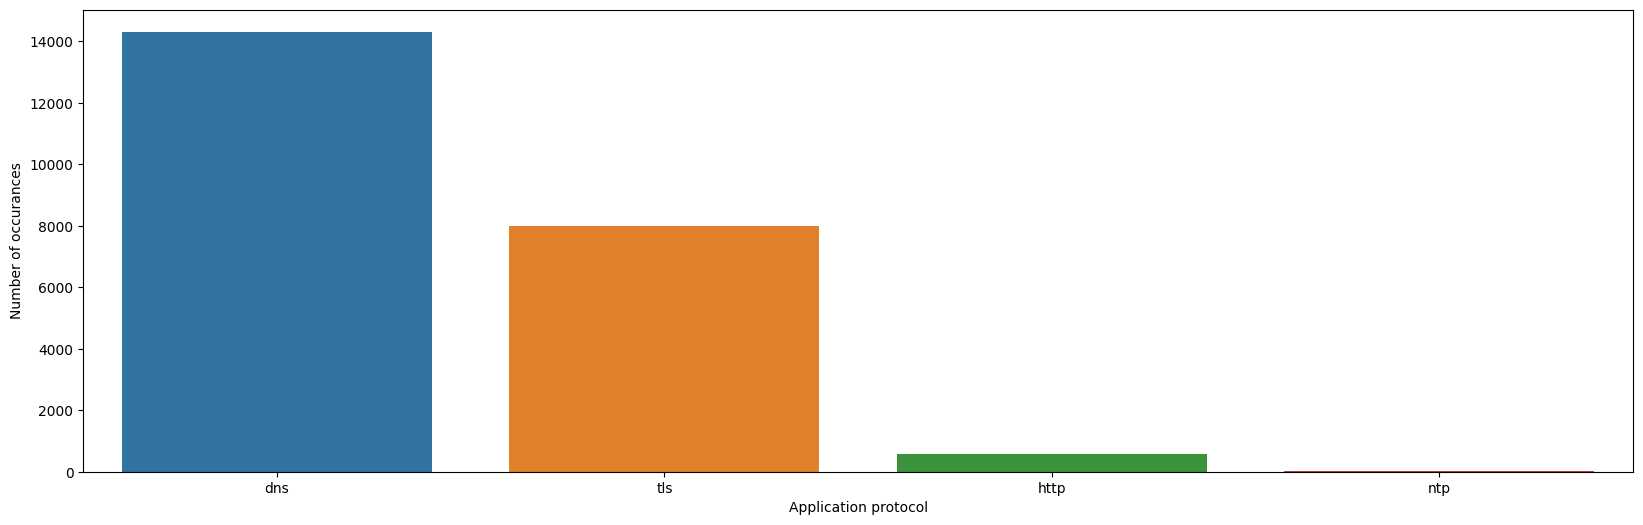

In [24]:
df_normal = pd.read_csv('dataset2.csv')
data2 = df_normal.groupby(['Application protocol']).agg({'Flow id': 'count'}).reset_index().sort_values("Flow id", ascending=False)
data2 = data2[data2['Application protocol'] != "-"]
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(20, 6))
#sns.catplot(data=data, x='Dst port', y='Flow id', kind='bar')
sns.barplot(data=data2, x='Application protocol', y='Flow id', ax=ax)
ax.set_ylabel("Number of occurances")

In [31]:
df2 = pd.read_csv('dataset2.csv')
df2

,Flow id,Src IP,Dst IP,Dst port,Protocol,Application protocol,Duration,Received bytes,Received packets,Transmitted bytes,Transmitted packets,Total bytes,Total packets,label,family
0,-6732408375980886428,10.0.2.15,45.57.91.1,443,tcp,-,59,60,1,128,2,188,3,normal,-
1,6270525913440564850,10.0.2.15,142.251.37.110,443,tcp,tls,380,28374,36,2931,24,31305,60,normal,-
2,-8557483677302620287,10.0.2.15,45.57.91.1,443,tcp,-,65,60,1,128,2,188,3,normal,-
3,1500888118810571279,10.0.2.15,185.199.109.154,443,tcp,-,66,60,1,128,2,188,3,normal,-
4,-2745485131595753922,10.0.2.15,185.199.109.154,443,tcp,-,46,60,1,128,2,188,3,normal,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27076,8467448828878520286,10.0.2.61,142.251.36.72,443,udp,-,642,277963,207,5403,46,283366,253,normal,-
27077,-590751140154068557,10.0.2.61,8.8.8.8,53,udp,dns,79,125,1,93,1,218,2,normal,-
27078,-8768764171379144268,10.0.2.61,8.8.8.8,53,udp,dns,45,233,1,101,1,334,2,normal,-
27079,-6753927404191069560,10.0.2.61,8.8.8.8,53,udp,dns,60,156,1,83,1,239,2,normal,-


Text(0, 0.5, 'Number of occurances')

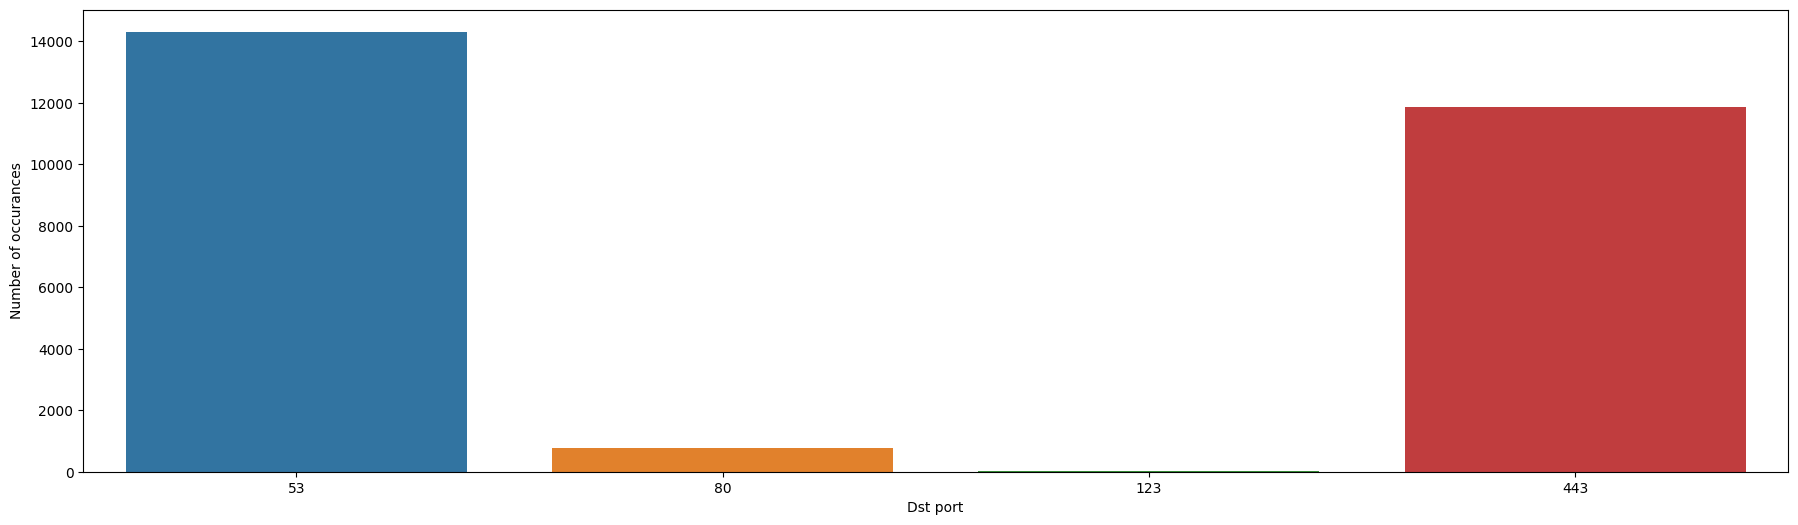

In [25]:
df = pd.read_csv('dataset2.csv')
data = df.groupby(['Dst port']).agg({'Flow id': 'count'}).reset_index().sort_values("Flow id", ascending=False)
data = data[data['Flow id'] >= 20]
data = data.sort_values('Flow id', ascending=False)
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(22, 6))
#sns.catplot(data=data, x='Dst port', y='Flow id', kind='bar')
sns.barplot(data=data, x='Dst port', y='Flow id', ax=ax)
ax.set_ylabel("Number of occurances")

In [43]:
df_malware = pd.read_csv('dataset.csv')
d = df_malware.groupby(['label']).agg({'Flow id' : 'count'})
df_normal = pd.read_csv('dataset2.csv')
df_list = [df_malware, df_normal]
#final = pd.concat(df_list)
final = df_normal.append(df_malware)
print(df_malware.shape, " ", df_normal.shape, " ", final.shape)
final

         Flow id
label           
malware     7794
normal      9306
(17100, 15)   (27081, 15)   (44181, 15)


/tmp/ipykernel_13802/1462684878.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final = df_normal.append(df_malware)


,Flow id,Src IP,Dst IP,Dst port,Protocol,Application protocol,Duration,Received bytes,Received packets,Transmitted bytes,Transmitted packets,Total bytes,Total packets,label,family
0,-6732408375980886428,10.0.2.15,45.57.91.1,443,tcp,-,59,60,1,128,2,188,3,normal,-
1,6270525913440564850,10.0.2.15,142.251.37.110,443,tcp,tls,380,28374,36,2931,24,31305,60,normal,-
2,-8557483677302620287,10.0.2.15,45.57.91.1,443,tcp,-,65,60,1,128,2,188,3,normal,-
3,1500888118810571279,10.0.2.15,185.199.109.154,443,tcp,-,66,60,1,128,2,188,3,normal,-
4,-2745485131595753922,10.0.2.15,185.199.109.154,443,tcp,-,46,60,1,128,2,188,3,normal,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17095,7560851527351583533,10.127.0.159,8.8.8.8,53,udp,dns,9,137,1,72,1,209,2,normal,-
17096,50553069127977102,10.127.0.159,193.56.146.11,4173,tcp,-,15058,0,0,260,5,260,5,malware,amadey
17097,-2996130545563176908,10.127.0.159,193.56.146.11,4173,tcp,-,15012,0,0,260,5,260,5,malware,amadey
17098,-2750654052729031985,10.127.0.99,193.56.146.220,4174,tcp,-,11433,19135,294,1113893,830,1133028,1124,malware,amadey


In [42]:
data = final.groupby(['label']).agg({'Flow id' : 'count'})
data

,Flow id
label,
malware,7794
normal,36387


Text(0, 0.5, 'Number of occurances')

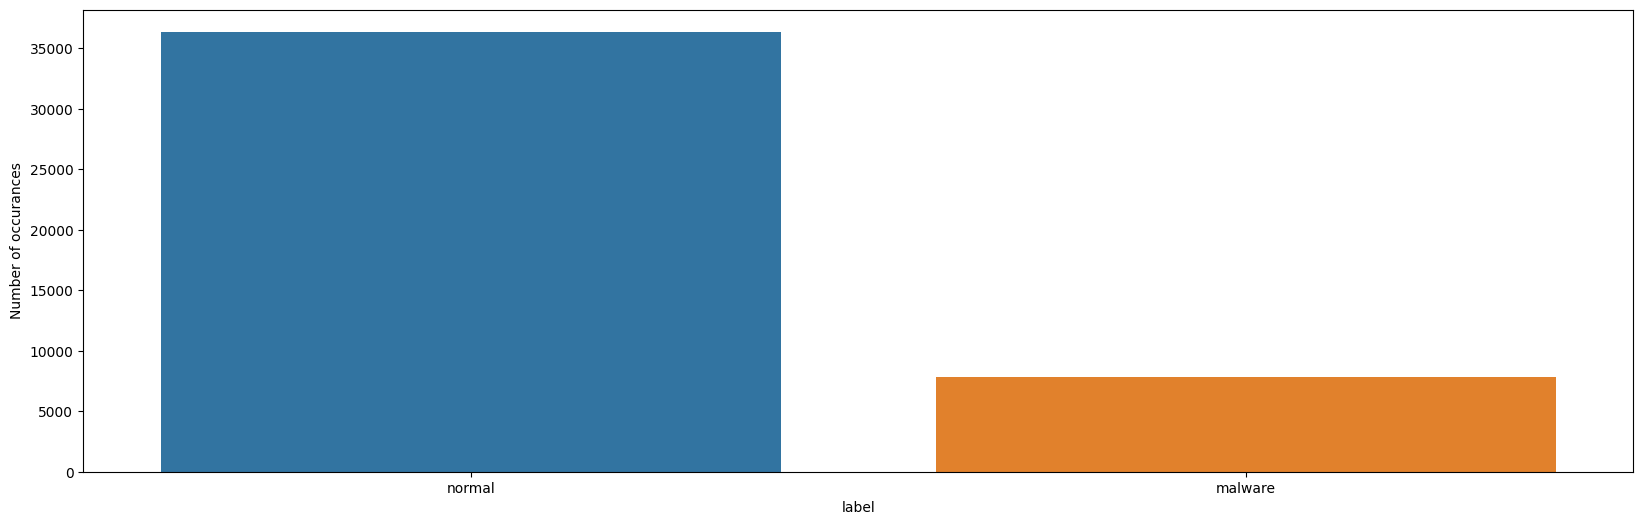

In [41]:
data = data3 = final.groupby(['label']).agg({'Flow id': 'count'}).reset_index().sort_values("Flow id", ascending=False)
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(20, 6))
sns.barplot(data=data3, x='label', y='Flow id', ax=ax)
ax.set_ylabel("Number of occurances")

In [28]:
cnt_malicious = data.loc[0]['Flow id']
cnt_normal = data.loc[1]['Flow id']
print("Malicious: ", cnt_malicious/(cnt_malicious+cnt_normal), " ", cnt_malicious)

Malicious:  0.17641067427174578   7794


In [39]:
data

,label,Flow id
1,normal,36387
0,malware,7794


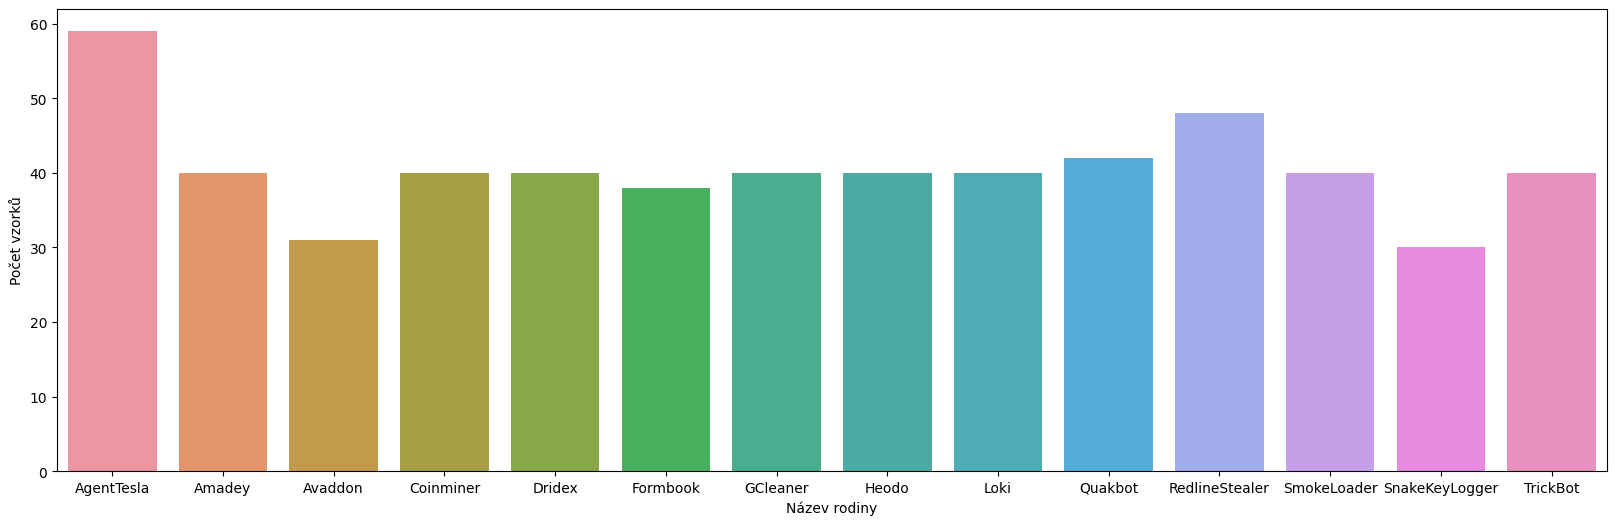

In [29]:
table = pd.DataFrame(columns=['Název rodiny', 'Počet vzorků'])
table['Název rodiny'] = ['AgentTesla','Amadey','Avaddon','Coinminer','Dridex','Formbook','GCleaner','Heodo','Loki','Quakbot','RedlineStealer','SmokeLoader','SnakeKeyLogger','TrickBot']
table['Počet vzorků'] = [59,40,31,40,40,38,40,40,40,42,48,40,30,40]
fig, ax = plt.subplots(figsize=(20, 6))
sns.barplot(data=table, x='Název rodiny', y='Počet vzorků', ax=ax)
plt.savefig("img/family_overview.png")

In [30]:
df_normal = pd.read_csv('dataset2.csv')

for col in df_normal:
    
    print(col, " ",df[col].unique())

Flow id   [-6732408375980886428  6270525913440564850 -8557483677302620287 ...
 -8768764171379144268 -6753927404191069560 -8732300576815816732]
Src IP   ['10.0.2.15' 'fe80:0000:0000:0000:8fc8:b416:45a8:93c4' '54.186.10.12'
 '137.254.60.32' '44.226.72.95' '54.70.68.230' '35.164.248.86'
 '142.251.36.100' '44.237.163.41' '10.0.2.16' '52.43.170.27'
 '142.251.36.67' '54.184.102.146' '35.158.48.183' '151.101.193.181'
 '151.101.193.7' '142.251.36.98' '34.120.208.123' '192.229.221.95'
 '34.160.144.191' '151.101.194.49' '142.251.36.132' '34.117.237.239'
 '65.9.95.76' '65.9.9.138' '142.251.37.110' '35.241.9.150' '8.8.8.8'
 '95.100.146.66' '10.0.2.27' '44.235.159.98' '10.0.2.40' '10.0.2.35'
 '10.0.2.43' '10.0.2.61' '52.39.49.137']
Dst IP   ['45.57.91.1' '142.251.37.110' '185.199.109.154' ... '104.16.85.20'
 '54.76.238.75' '216.239.32.178']
Dst port   [  443    80  5353    53 33688   123 39252 41144  8443  3478 19302 53481
 10535 65301 20198 58401 56170 60622 50046 56910 46460 41304 51964 48804
 43